<a href="https://colab.research.google.com/github/nitinsharma006/data_science/blob/main/Solving_Loan_Prediction_problem_using_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


# Steps to build a Neural Network using Keras

<ol>1. Loading the dataset</ol>
<ol>2. Creating training and validation set</ol>
<ol>3. Defining the architecture of the model</ol>
<ol>4. Compiling the model (defining loss function, optimizer)</ol>
<ol>5. Training the model</ol>
<ol>6. Evaluating model performance on training and validation set</ol>

## 1. Loading the dataset

In [2]:
# importing the required libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# check version on sklearn
print('Version of sklearn:', sklearn.__version__)

Version of sklearn: 1.0.2


In [4]:
from google.colab import files
 
 
uploaded = files.upload()

Saving loan_prediction_data.csv to loan_prediction_data.csv


In [5]:
# loading the pre-processed dataset
data = pd.read_csv('loan_prediction_data.csv')

In [6]:
# looking at the first five rows of the dataset
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,LP001003,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,LP001005,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,LP001006,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,LP001008,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [7]:
# checking missing values
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
# checking the data type
data.dtypes

Loan_ID               object
Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

In [9]:
# removing the loan_ID since these are just the unique values
data = data.drop('Loan_ID', axis=1)

In [10]:
# looking at the shape of the data
data.shape

(614, 12)

In [11]:
# separating the independent and dependent variables

# storing all the independent variables as X
X = data.drop('Loan_Status', axis=1)

# storing the dependent variable as y
y = data['Loan_Status']

In [12]:
# shape of independent and dependent variables
X.shape, y.shape

((614, 11), (614,))

## 2. Creating training and validation set

In [13]:
# Creating training and validation set

# stratify will make sure that the distribution of classes in train and validation set it similar
# random state to regenerate the same train and validation set
# test size 0.2 will keep 20% data in validation and remaining 80% in train set

X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=data['Loan_Status'],random_state=10,test_size=0.2)

In [14]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((491, 11), (491,)), ((123, 11), (123,)))

## 3. Defining the architecture of the model

In [15]:
# checking the version of keras
import keras
print(keras.__version__)

Using TensorFlow backend.


2.3.1


In [16]:
# checking the version of tensorflow
import tensorflow as tf
print(tf.__version__)

1.15.2


### a. Create a model

<img src='https://drive.google.com/uc?id=1iZNZ3kwSHRNf-Irn3DZmMuBb6K-Lro7w'>

In [17]:
# importing the sequential model
from keras.models import Sequential

### b. Defining different layers

<img src='https://drive.google.com/uc?id=16X6De2hua1XJBe3dfmUUeGTgP6PbXEpc'>

In [18]:
# importing different layers from keras
from keras.layers import InputLayer, Dense 

<img src='https://drive.google.com/uc?id=1tsy4B6G0UN4-J4L4roOdoWQiZMUdgw2a'>

In [19]:
# number of input neurons
X_train.shape

(491, 11)

In [20]:
# number of features in the data
X_train.shape[1]

11

In [21]:
# defining input neurons
input_neurons = X_train.shape[1]

<img src='https://drive.google.com/uc?id=1xL_hM9rGItZjsZ8Lofwzw_9fZUi4bgJo'>

In [22]:
# number of output neurons

# since loan prediction is a binary classification problem, we will have single neuron in the output layer 

In [23]:
# define number of output neurons
output_neurons = 1

In [24]:
# number of hidden layers and hidden neurons

# It is a hyperparameter and we can pick the hidden layers and hidden neurons on our own

In [25]:
# define hidden layers and neuron in each layer
number_of_hidden_layers = 2
neuron_hidden_layer_1 = 10
neuron_hidden_layer_2 = 5

In [26]:
# activation function of different layers

# for now I have picked relu as an activation function for hidden layers, you can change it as well
# since it is a binary classification problem, I have used sigmoid activation function in the final layer

In [27]:
# defining the architecture of the model
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model.add(Dense(units=output_neurons, activation='sigmoid'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [28]:
# summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                120       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [29]:
# number of parameters between input and first hidden layer

input_neurons*neuron_hidden_layer_1

110

In [30]:
# number of parameters between input and first hidden layer

# adding the bias for each neuron of first hidden layer

input_neurons*neuron_hidden_layer_1 + 10

120

In [31]:
# number of parameters between first and second hidden layer

neuron_hidden_layer_1*neuron_hidden_layer_2 + 5

55

In [32]:
# number of parameters between second hidden and output layer

neuron_hidden_layer_2*output_neurons + 1

6

## 4. Compiling the model (defining loss function, optimizer)

In [33]:
# compiling the model

# loss as binary_crossentropy, since we have binary classification problem
# defining the optimizer as adam
# Evaluation metric as accuracy

model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## 5. Training the model

In [34]:
# training the model

# passing the independent and dependent features for training set for training the model

# validation data will be evaluated at the end of each epoch

# setting the epochs as 50

# storing the trained model in model_history variable which will be used to visualize the training process

model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)


Train on 491 samples, validate on 123 samples
Epoch 1/50
491/491 [==============================] - 1s 2ms/step - loss: 0.7228 - accuracy: 0.3299 - val_loss: 0.7031 - val_accuracy: 0.4065
Epoch 2/50
491/491 [==============================] - 0s 87us/step - loss: 0.7005 - accuracy: 0.4562 - val_loss: 0.6841 - val_accuracy: 0.5610
Epoch 3/50
491/491 [==============================] - 0s 97us/step - loss: 0.6811 - accuracy: 0.6049 - val_loss: 0.6670 - val_accuracy: 0.6667
Epoch 4/50
491/491 [==============================] - 0s 91us/step - loss: 0.6630 - accuracy: 0.6701 - val_loss: 0.6541 - val_accuracy: 0.6911
Epoch 5/50
491/491 [==============================] - 0s 86us/step - loss: 0.6498 - accuracy: 0.6843 - val_loss: 0.6415 - val_accuracy: 0.6911
Epoch 6/50
491/491 [==============================] - 0s 97us/step - loss: 0.6356 - accuracy: 0.6864 - val_loss: 0.6297 - val_accuracy: 0.6911
Epoch 7/50
491/491 [==============================] - 0s 92us/step - loss: 0.6238 - accuracy: 0.

## 6. Evaluating model performance on validation set

In [35]:
# getting predictions for the validation set
prediction = model.predict_classes(X_test)

In [36]:
# calculating the accuracy on validation set
accuracy_score(y_test, prediction)

0.7967479674796748

### Visualizing the model performance

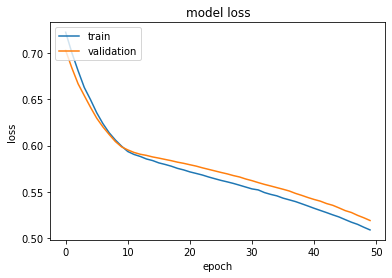

In [37]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [38]:
# summarize history for accuracy
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

KeyError: ignored